In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
url = 'https://books.toscrape.com/'
response = requests.get(url)
print(response)

<Response [200]>


In [ ]:
print(response.text)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    All products | Books to Scrape - Sandbox
</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
        <meta name="created" content="24th Jun 2016 09:29" />
        <meta name="description" content="" />
        <meta name="viewport" content="width=device-width" />
        <meta name="robots" content="NOARCHIVE,NOCACHE" />

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="static/oscar/favicon.

In [ ]:
type(response.text)

str

In [ ]:
soup = bs(response.text)
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.find('title').text

'\n    All products | Books to Scrape - Sandbox\n'

In [ ]:
#remove the characters from the beginning or end of the string for the characters that are passed as parameters to the strip()

soup.find('title').text.strip()

'All products | Books to Scrape - Sandbox'

![Screenshot 2024-01-13 at 11.07.41 PM.png](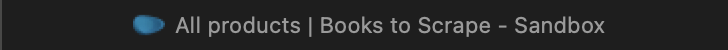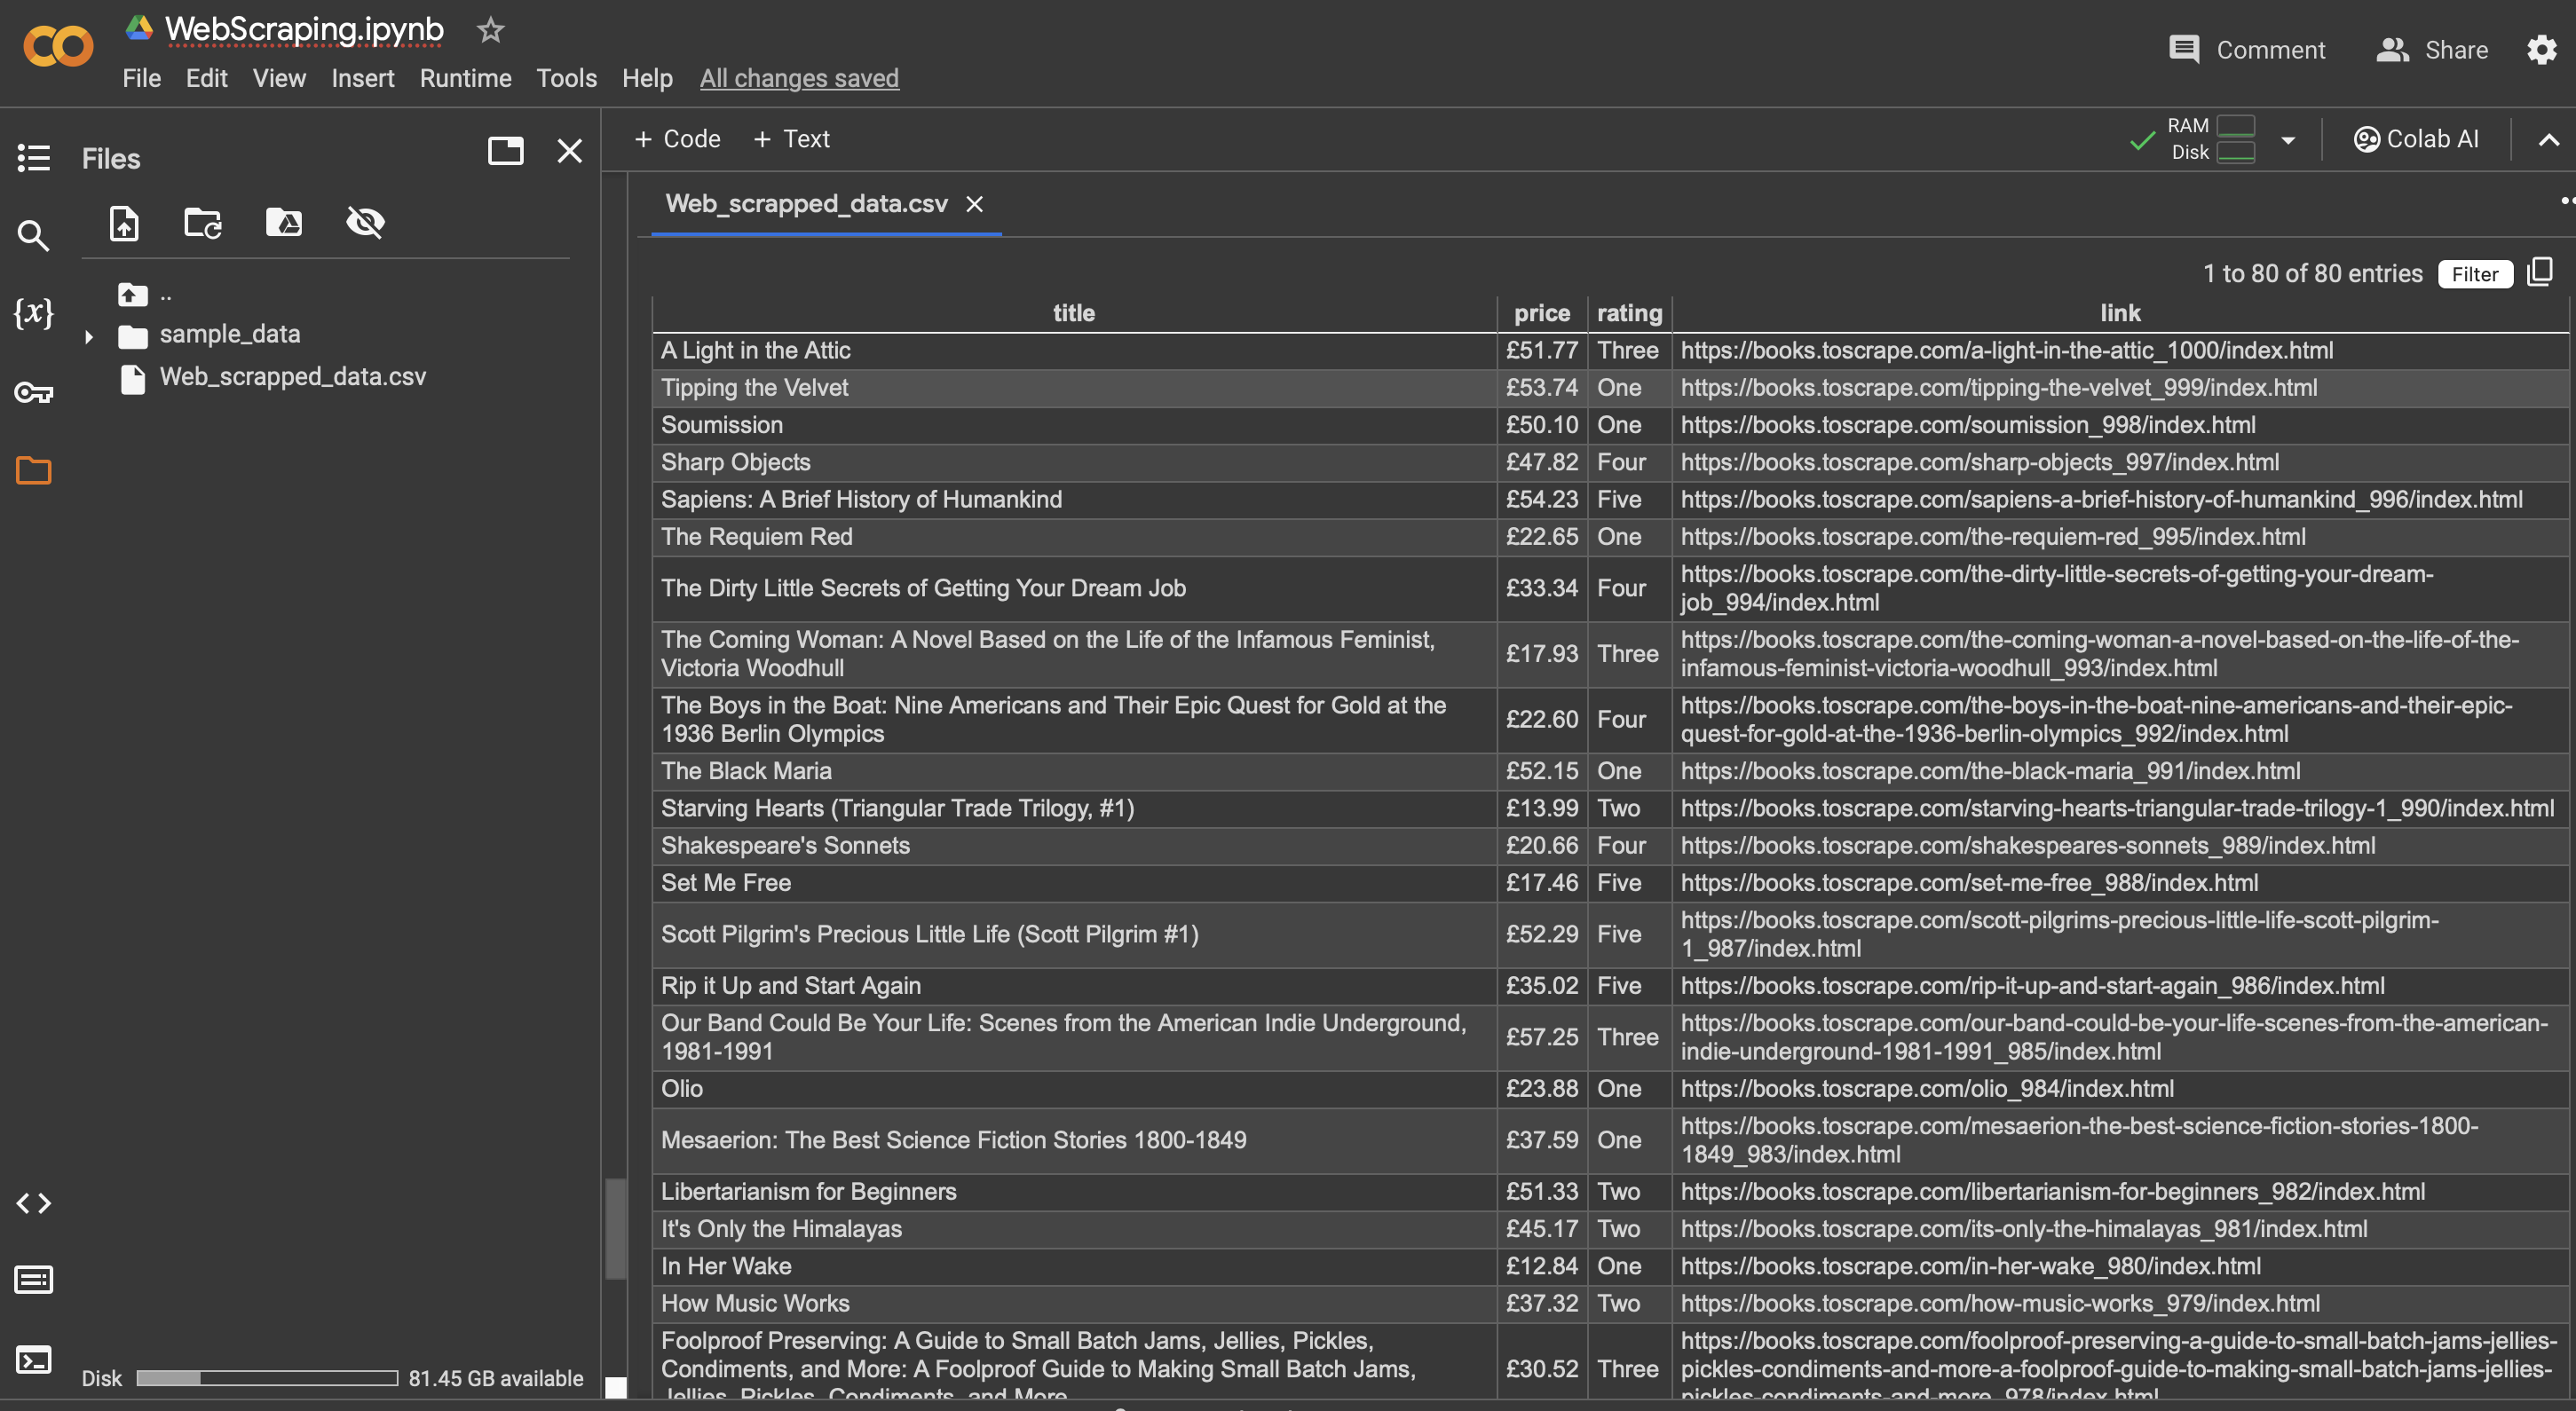)

In [ ]:
books_tag = soup.find_all('article',class_='product_pod')
len(books_tag) #number of books in a page

20

In [ ]:
#pick one article block from books_tag as book_tag
book_tag = books_tag[0]
book_tag



<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [ ]:
#price,title,rating,link

title_tag = book_tag.find('a',title=True)
title_tag

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [ ]:
title_tag.text

'A Light in the ...'

In [ ]:
#Title not extartced completedly

title_tag['title']

'A Light in the Attic'

This is the simplified single code format

In [ ]:
#Title
title = book_tag.find('a',title=True)['title']
title

'A Light in the Attic'

In [ ]:
#Rating
rating = book_tag.find('p')['class'][1]        #['star-rating','Three']
rating

'Three'

In [ ]:
#Price
price = book_tag.find('p',class_='price_color').text[1:]  #to remove the unwanted symbol
price

'£51.77'

In [ ]:
#Link
link = book_tag.find('a')['href']
link

'catalogue/a-light-in-the-attic_1000/index.html'

In [ ]:
link = 'https://books.toscrape.com/'+link
link

'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

# **Now we write a function for all these to do the task for all books in books_tag**

In [ ]:
def getDetails(book_tag):
  title = book_tag.find('a',title=True)['title']
  rating = book_tag.find('p')['class'][1]
  price = book_tag.find('p',class_='price_color').text[1:]
  link = book_tag.find('a')['href']
  link = 'https://books.toscrape.com/'+link
  return title,price,rating,link

In [ ]:
def getSoup(url):
  resp = requests.get(url)
  if resp.status_code == 200: return bs(resp.text)
  else: return None

def getBooks(url):
  soup = getSoup(url)
  book_tags = soup.find_all('article',class_='product_pod')

  books = []
  for book_tag in book_tags:
    books.append(getDetails(book_tag))
  return books

In [ ]:
url = 'https://books.toscrape.com/'
books = getBooks(url)
books

[('A Light in the Attic',
  '£51.77',
  'Three',
  'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'),
 ('Tipping the Velvet',
  '£53.74',
  'One',
  'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html'),
 ('Soumission',
  '£50.10',
  'One',
  'https://books.toscrape.com/catalogue/soumission_998/index.html'),
 ('Sharp Objects',
  '£47.82',
  'Four',
  'https://books.toscrape.com/catalogue/sharp-objects_997/index.html'),
 ('Sapiens: A Brief History of Humankind',
  '£54.23',
  'Five',
  'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html'),
 ('The Requiem Red',
  '£22.65',
  'One',
  'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html'),
 ('The Dirty Little Secrets of Getting Your Dream Job',
  '£33.34',
  'Four',
  'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html'),
 ('The Coming Woman: A Novel Based on the Life of the Infamous Femi

In [ ]:
len(books)

20

In [ ]:
books[0]

('A Light in the Attic',
 '£51.77',
 'Three',
 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html')

In [ ]:
import pandas as pd

books = pd.DataFrame(books,columns=['title','price','rating','link'])
books

,title,price,rating,link
0,A Light in the Attic,£51.77,Three,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,£53.74,One,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,£50.10,One,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,£47.82,Four,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History of Humankind,£54.23,Five,https://books.toscrape.com/catalogue/sapiens-a...
5,The Requiem Red,£22.65,One,https://books.toscrape.com/catalogue/the-requi...
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four,https://books.toscrape.com/catalogue/the-dirty...
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three,https://books.toscrape.com/catalogue/the-comin...
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four,https://books.toscrape.com/catalogue/the-boys-...
9,The Black Maria,£52.15,One,https://books.toscrape.com/catalogue/the-black...


# **We Have Tuples of our desired data scrap, We'll use pandas to make it a dataframe and convert to CSV**

In [ ]:
import pandas as pd

In [ ]:
def getAllBooks(page):
  books =[]
  for i in range(1,page+1):
    url = f'http://books.toscrape.com/catalogue/page-{i}.html'
    soup = getSoup(url)
    if soup:
      book_tags = soup.find_all('article',class_='product_pod')
      for book_tag in book_tags:
        books.append(getDetails(book_tag))

  books = pd.DataFrame(books,columns=['title','price','rating','link'])
  return books


In [ ]:
data = getAllBooks(4)
data.head()

,title,price,rating,link
0,A Light in the Attic,£51.77,Three,https://books.toscrape.com/a-light-in-the-atti...
1,Tipping the Velvet,£53.74,One,https://books.toscrape.com/tipping-the-velvet_...
2,Soumission,£50.10,One,https://books.toscrape.com/soumission_998/inde...
3,Sharp Objects,£47.82,Four,https://books.toscrape.com/sharp-objects_997/i...
4,Sapiens: A Brief History of Humankind,£54.23,Five,https://books.toscrape.com/sapiens-a-brief-his...


In [ ]:
data.shape              ## 4 x 20 = 80 books

(80, 4)

In [ ]:
data.to_csv('Web_scrapped_data.csv',index=False)


## Screenshot of the final Output

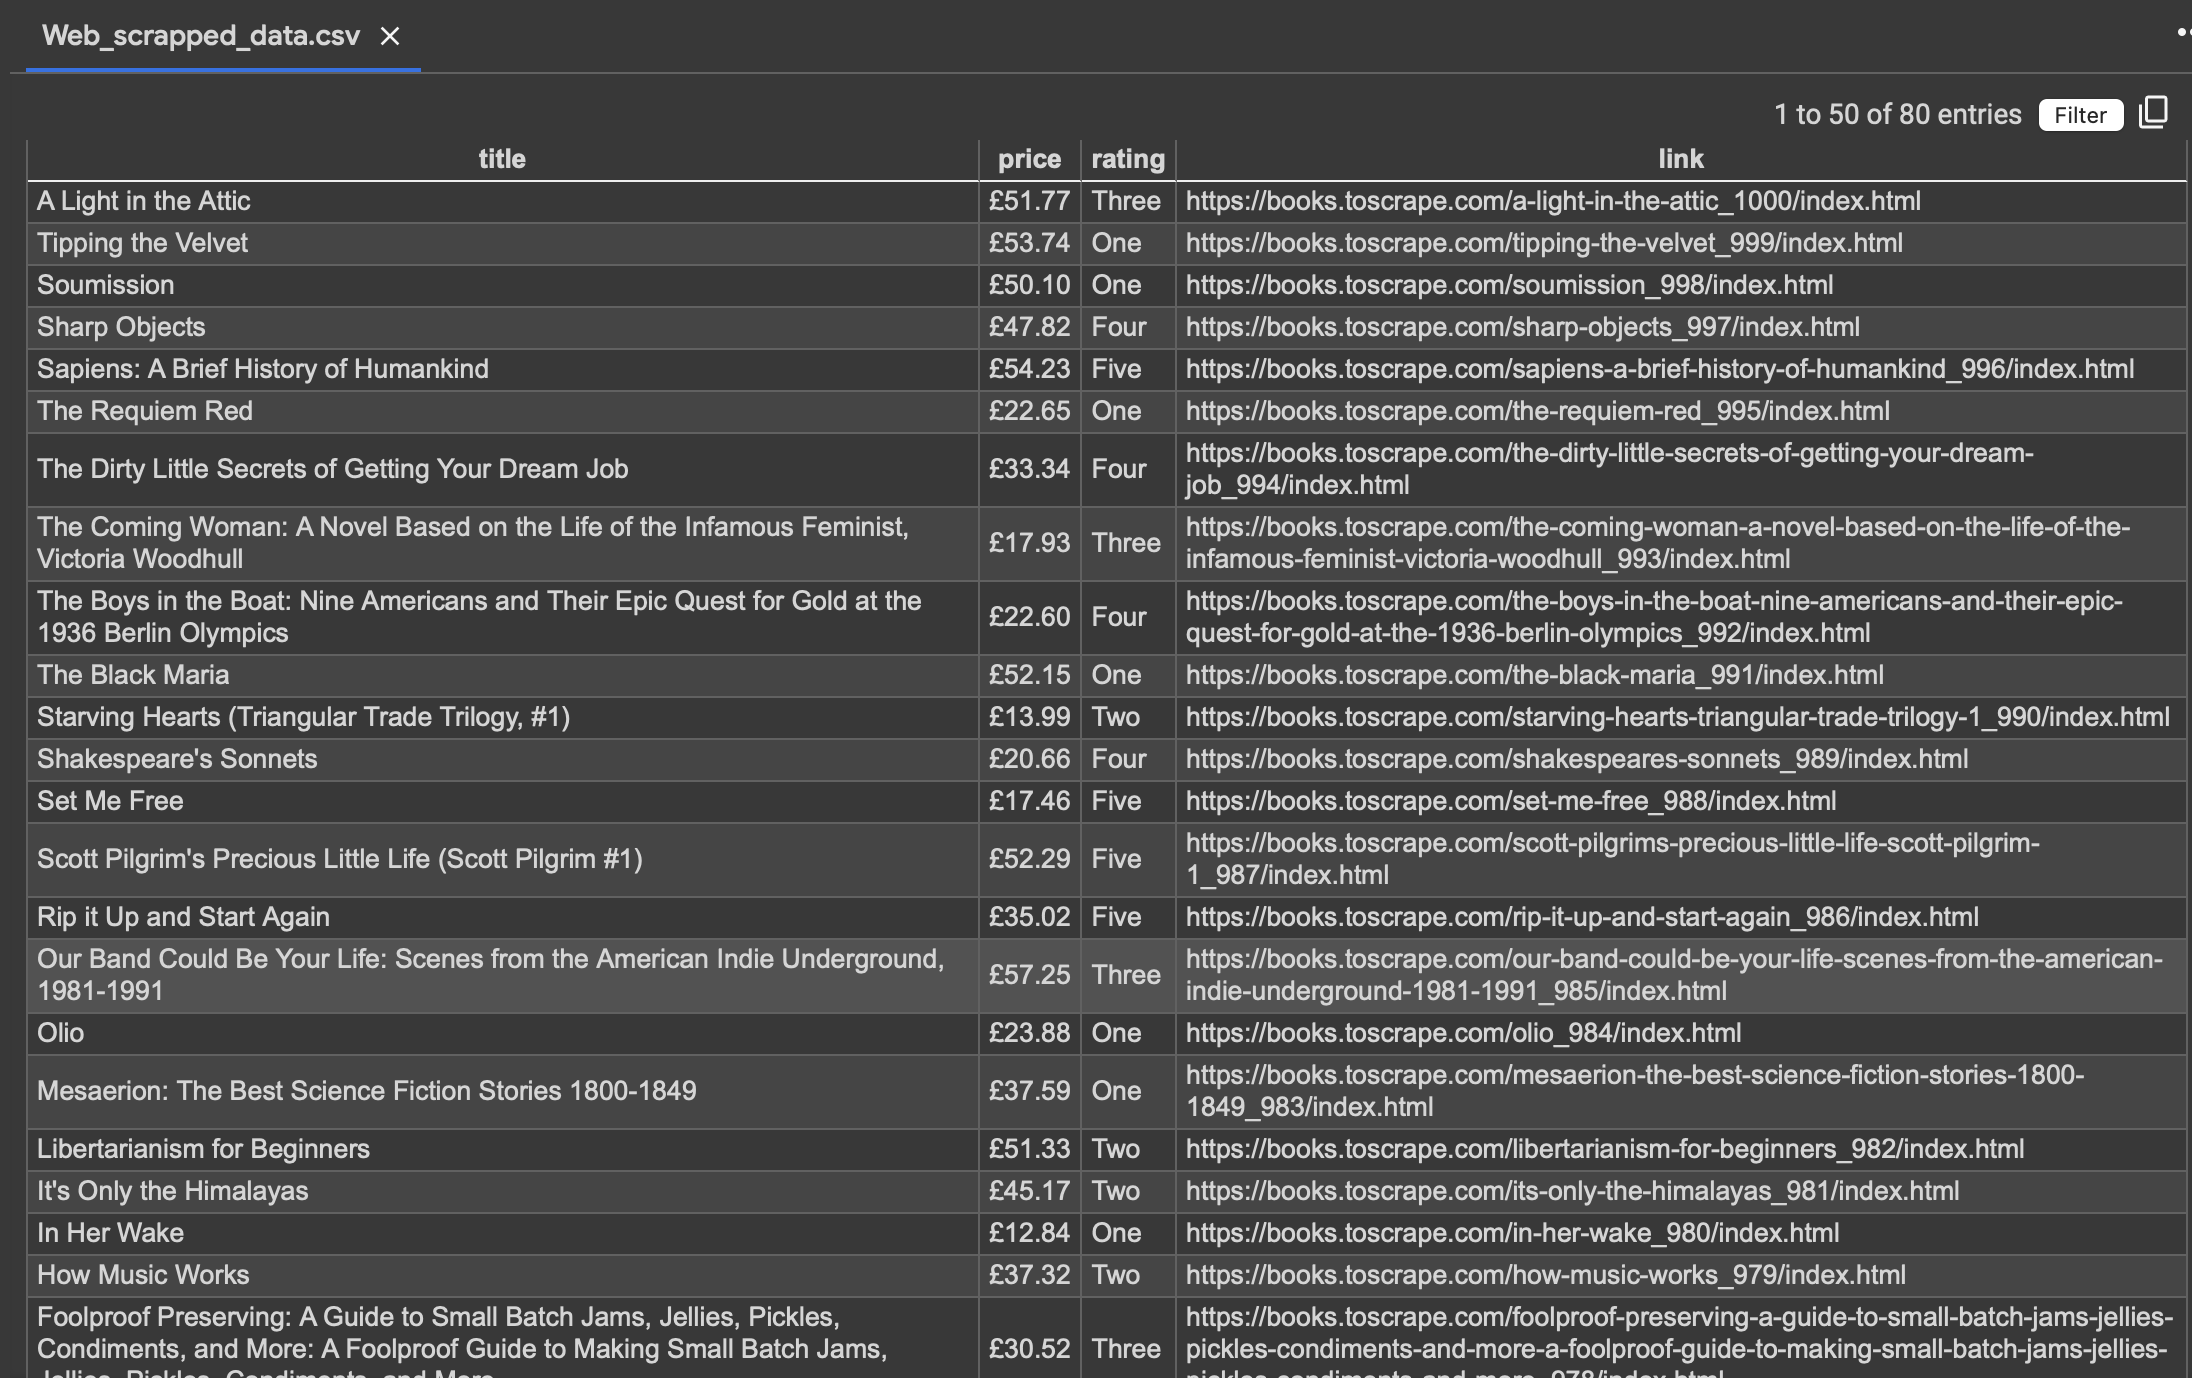